<a href="https://colab.research.google.com/github/Rstam59/TaskDataRepoForStudents/blob/main/CNN_food_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-04-03 06:35:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.5MB/s    in 5.7s    

2025-04-03 06:35:15 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# 1)
# !unzip /content/pizza_steak.zip

In [3]:
# 2)
# zip_ref = zipfile.ZipFile('/content/pizza_steak.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [4]:
with zipfile.ZipFile('/content/pizza_steak.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [5]:
!ls /content/pizza_steak/test

pizza  steak


In [6]:
import os

for dirpath, dirnames, filenames in os.walk('/content/pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/pizza_steak'.
There are 2 directories and 0 images in '/content/pizza_steak/train'.
There are 0 directories and 750 images in '/content/pizza_steak/train/pizza'.
There are 0 directories and 750 images in '/content/pizza_steak/train/steak'.
There are 2 directories and 0 images in '/content/pizza_steak/test'.
There are 0 directories and 250 images in '/content/pizza_steak/test/pizza'.
There are 0 directories and 250 images in '/content/pizza_steak/test/steak'.


In [7]:
num_steak_images_train = len(os.listdir('/content/pizza_steak/train/pizza'))
num_steak_images_train

750

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib


def view_random_image(target_dir, target_class):
    target_folder = pathlib.Path(target_dir) / target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    path = target_folder / random_image[0]
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img.shape

(512, 512, 3)

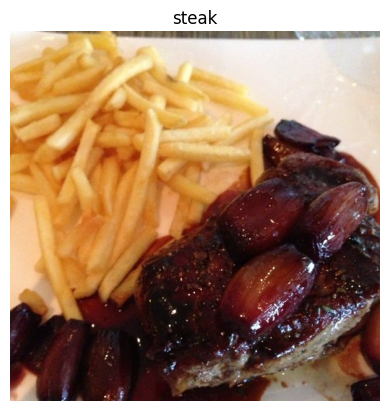

In [9]:
view_random_image(target_dir='/content/pizza_steak/train/', target_class='steak')


In [10]:
import tensorflow as tf


IMG_SIZE = (224, 224)

train_dir = '/content/pizza_steak/train/'
test_dir = '/content/pizza_steak/test/'


train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 label_mode = 'binary',
                                                                 shuffle = True,
                                                                 batch_size =32,
                                                                 image_size = IMG_SIZE)



test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'binary',
                                                                image_size = IMG_SIZE)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [224, 224, 3]),
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64, activation= 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [224, 224, 3]),
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                            activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 128, activation = 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 64, activation= 'relu',
                          kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')

])

In [17]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001, momentum = 0.9),
              metrics = ['accuracy'])


model.fit(train_data, validation_data = test_data, epochs = 5)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 268ms/step - accuracy: 0.5240 - loss: 0.9940 - val_accuracy: 0.6380 - val_loss: 0.6725
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.5713 - loss: 0.6672 - val_accuracy: 0.7160 - val_loss: 0.6166
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.6032 - loss: 0.6475 - val_accuracy: 0.7540 - val_loss: 0.5663
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.6687 - loss: 0.5841 - val_accuracy: 0.7680 - val_loss: 0.5418
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.6666 - loss: 0.5943 - val_accuracy: 0.7960 - val_loss: 0.4781


In [18]:
model.evaluate(train_data)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8055 - loss: 0.4797


[0.4876704514026642, 0.7946666479110718]

In [19]:
model.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7920 - loss: 0.4968


[0.4780692458152771, 0.7960000038146973]

In [26]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomHeight(0.1),
    tf.keras.layers.RandomWidth(0.1)
])

In [29]:
class_names = train_data.class_names
class_names

['pizza', 'steak']

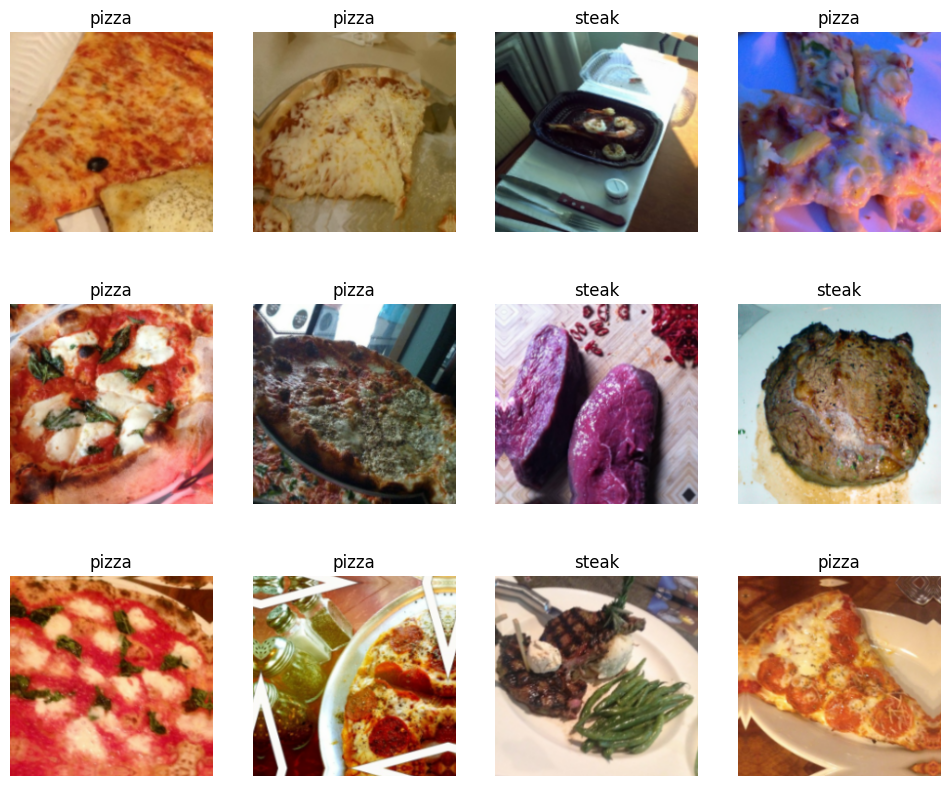

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
for images, labels in train_data.take(1):
    images_augmented = data_augmentation(images)
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images_augmented[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i].numpy().astype('int8')[0]])
        plt.axis('off')

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1 / 255.),
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])


In [41]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.0003, momentum=0.9),
              metrics=['accuracy'])

In [42]:
model.fit(train_data, epochs=5,
          validation_data=test_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.6922 - loss: 0.5798 - val_accuracy: 0.7760 - val_loss: 0.5192
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.6844 - loss: 0.5812 - val_accuracy: 0.7820 - val_loss: 0.4958
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.6749 - loss: 0.5722 - val_accuracy: 0.7780 - val_loss: 0.5044
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.7178 - loss: 0.5461 - val_accuracy: 0.7720 - val_loss: 0.5070
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.7243 - loss: 0.5479 - val_accuracy: 0.7760 - val_loss: 0.4986


In [43]:
base_model = tf.keras.applications.ResNet50(include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

output = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(avg)

model = tf.keras.Model(inputs = base_model.input, outputs = output)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [48]:
base_model.trainable = False

In [50]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 47,
    decay_rate = 0.96
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])


model.fit(train_data, epochs = 15,
          validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.8478 - loss: 0.3438 - val_accuracy: 0.9760 - val_loss: 0.0865
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9549 - loss: 0.1329 - val_accuracy: 0.9820 - val_loss: 0.0649
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.9706 - loss: 0.0852 - val_accuracy: 0.9800 - val_loss: 0.0824
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9654 - loss: 0.0851 - val_accuracy: 0.9880 - val_loss: 0.0588
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9822 - loss: 0.0480 - val_accuracy: 0.9860 - val_loss: 0.0599
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9854 - loss: 0.0431 - val_accuracy: 0.9880 - val_loss: 0.0528
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9895 - loss: 0.0314 - val_accuracy: 0.9900 - val_loss: 0.0504
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9936 - loss: 0.0245 - val_accuracy: 0.9

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))


x = data_augmentation(inputs)


x = tf.keras.applications.resnet50.preprocess_input(x)


base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=x)


x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)


outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=47,
    decay_rate=0.96,
    staircase=False)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule, momentum = 0.9),
              metrics = ['accuracy'])

model.fit(train_data, epochs = 15,
          validation_data = test_data,
          callbacks = early_stopping)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 53s 941ms/step - accuracy: 0.8355 - loss: 0.3189 - val_accuracy: 0.9880 - val_loss: 0.0511
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 624ms/step - accuracy: 0.9472 - loss: 0.1544 - val_accuracy: 0.9840 - val_loss: 0.0625
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 534ms/step - accuracy: 0.9611 - loss: 0.1293 - val_accuracy: 0.9720 - val_loss: 0.0833
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 526ms/step - accuracy: 0.9671 - loss: 0.0886 - val_accuracy: 0.9920 - val_loss: 0.0393
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 492ms/step - accuracy: 0.9690 - loss: 0.0772 - val_accuracy: 0.9900 - val_loss: 0.0392
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 473ms/step - accuracy: 0.9803 - loss: 0.0508 - val_accuracy: 0.9920 - val_loss: 0.0398
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 401ms/step - accuracy: 0.9730 - loss: 0.0597 - val_accuracy: 0.9920 - val_loss: 0.0442
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 423ms/step - accuracy: 0.9675 - loss: 0.0708 - val_accu

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2025-04-02 08:39:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 64.233.170.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  23.7MB/s    in 69s     

2025-04-02 08:40:13 (22.4 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [ ]:
model.save('test.keras')